In [2]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

#Per linear classification
from sklearn.linear_model import Perceptron
from sklearn import svm

print('Libraries imported.')

Libraries imported.


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
filename = '/content/drive/MyDrive/ColabNotebooks/MachineLearning/HomeWork1_Dataset.tsv'
df = pd.read_csv(filename, sep='\t', header=0)
print('File loaded: %d samples.' %(len(df)))
print("Number of columns: ", len(df.columns))

File loaded: 1000 samples.
Number of columns:  37


In [5]:
X_all = df.iloc[:,:35]
classification_y_all = df['num_collisions']
regression_y_all = df['min_CPA']


#apply normalization
X_normalized = X_all.copy()
for column in X_normalized.columns:
  X_normalized[column] = (X_normalized[column] - X_normalized[column].min()) / (X_normalized[column].max() - X_normalized[column].min())    


reg_y_all_normalized = regression_y_all.copy()
reg_y_all_normalized = (reg_y_all_normalized - reg_y_all_normalized.min()) / (reg_y_all_normalized.max() - reg_y_all_normalized.min())    

In [6]:
#Divisione del dataset trainig e test
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X_normalized,reg_y_all_normalized,train_size=0.66,random_state=200)

print("Dataset x train :", x_train.shape)
print("Dataset y train :", y_train.shape)
print("Dataset x test :", x_test.shape)
print("Dataset y test :", y_test.shape)

Dataset x train : (660, 35)
Dataset y train : (660,)
Dataset x test : (340, 35)
Dataset y test : (340,)


In [7]:
model_type = "poly_svm"  # "linear_regression", "linear_svm", "poly_svm"

if model_type == "linear_regression":
  # Create linear regression object
  model = linear_model.LinearRegression()
  # Train the model using the training sets
  model.fit(x_train, y_train)

elif model_type == "linear_svm":
  # SVM regression
  model = SVR(kernel='linear', C=1.5)
  # Train the model using the training sets
  model.fit(x_train, y_train)

elif model_type == "poly_svm":
  # SVM polynomial regression
  model = SVR(kernel='poly', C=1.5, degree=3, gamma='scale')
  # Train the model using the training sets
  model.fit(x_train, y_train)


In [8]:
# Make predictions using the testing set
y_pred = model.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# R2 regression score: 1 is perfect prediction
print('Regression score: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.05
Regression score: -0.12


In [ ]:
print(x_test.shape)
print(y_test.shape)

(340, 35)
(340,)


In [ ]:
#Plot Output
from sklearn.manifold import MDS
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(x_train)



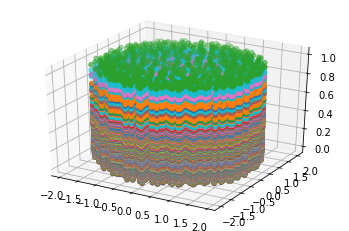

In [ ]:
ax = plt.axes(projection='3d')
for i in y_train:
  x = [row[0] for row in X_2d]
  y = [row[1] for row in X_2d]  
  ax.scatter3D(x,y,i,label="Cpa "+str(i))
plt.show()

In [ ]:
mds = MDS(1,random_state=0)
X_1d = mds.fit_transform(x_train)

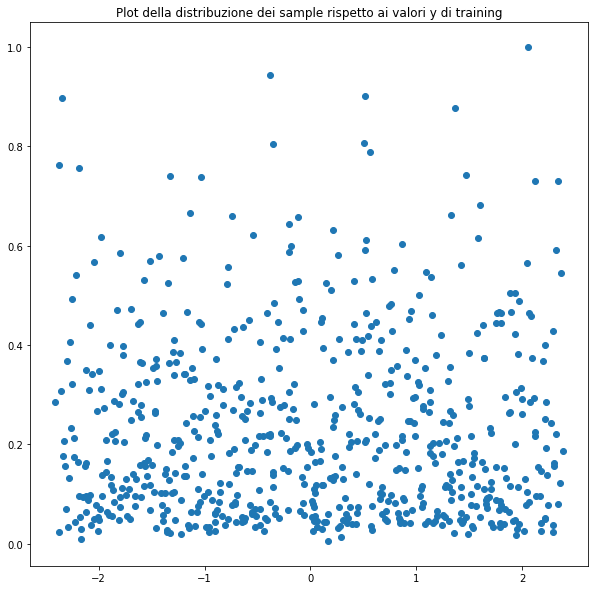

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(X_1d,y_train,label="Cpa "+str(i))
plt.title("Plot della distribuzione dei sample rispetto ai valori y di training")
plt.show()

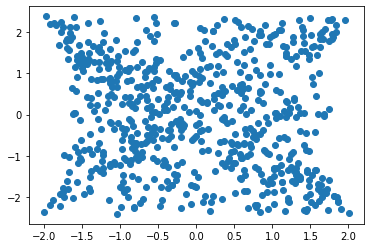

In [ ]:
plt.scatter(y,X_1d,label="Cpa "+str(i))


#Ensemble method for Regression

In [13]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error , accuracy_score
from math import sqrt

In [33]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.5 MB/s 
time: 613 µs (started: 2022-11-25 17:09:09 +00:00)


R2 of  SVM  ->  0.051685656172828165
MSE of  SVM  ->  0.041904058532645005
R2 of  Random Forest  ->  0.00868407412699379
MSE of  Random Forest  ->  0.04380420991469916


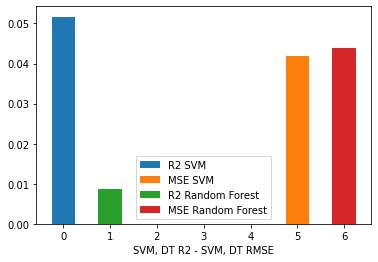

In [15]:
#BaseLine
regressor_name = ['S','D']

all_regressors = {
    'D': [RandomForestRegressor, 'Random Forest'],
    'S': [svm.SVR, 'SVM']
    }

algorithm = 'SAMME'

fig, ax = plt.subplots()
for i,clf in enumerate(regressor_name):
  model = all_regressors[clf][0]()
  model.fit(x_train, y_train)

  r2 = model.score(x_test, y_test)   
  y_pred = model.predict(x_test)
  ax.bar(i,r2,width=0.5,label='R2 '+all_regressors[clf][1])
  error = mean_squared_error(y_test,y_pred)
  ax.bar(i + 5,error,width=0.5,label='MSE '+all_regressors[clf][1])
  print("R2 of ",all_regressors[clf][1]," -> ",r2)
  print("MSE of ",all_regressors[clf][1]," -> ",error)

plt.xlabel("SVM, DT R2 - SVM, DT RMSE")
plt.legend()

In [17]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

random_state = 25
np.random.seed(random_state)

Bagging Regressor SVM

In [18]:
#Definizione degli enseble SU SVM (the best of baseline)
bagging_regressor = BaggingRegressor(
    base_estimator=svm.SVR(), 
    max_samples=int(len(x_train)/2), 
    n_estimators=30,  
    random_state=random_state,
    ).fit(x_train, y_train)

bagging_r2 = bagging_regressor.score(x_test, y_test)

y_pred = bagging_regressor.predict(x_test)
bagging_mse = mean_squared_error(y_test,y_pred)
print("SVM BAGGING: R2 ->",bagging_r2, " MSE->",bagging_mse)


SVM BAGGING: R2 -> 0.038540428833013785  MSE-> 0.04248491906634679


Boosting Regressor SVM

In [19]:
adaboost_regressor = AdaBoostRegressor(
    base_estimator=svm.SVR(gamma=1), 
    n_estimators=30, 
    learning_rate=1.0, 
    random_state=random_state
    ).fit(x_train, y_train)

ada_r2 = adaboost_regressor.score(x_test, y_test)
y_pred_ada = adaboost_regressor.predict(x_test)
boosting_mse = mean_squared_error(y_test,y_pred_ada)
print("R2 ",ada_r2," MSE->",boosting_mse)

R2  0.048807638133704034  MSE-> 0.04203123222473823


#Ensemble Method Grid Search

In [20]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV


In [25]:
# Ensemble classifier parameters
n_estimators =  np.random.randint(5, 50, 5)

# Bagging parameters
bagging_params = {
  'max_samples': np.random.randint(5,int(len(x_train)/2), 5),
  'n_estimators': n_estimators,
}
# Boosting parameters
boosting_params = {
  'learning_rate': [0.1,0.01,0.001],
  'n_estimators': n_estimators,
  }

print(f"Bagging parameters: {bagging_params}" )
print(f"Boosting parameters:  {boosting_params}")

Bagging parameters: {'max_samples': array([144, 170, 188,  22, 219]), 'n_estimators': array([36, 10, 41, 24, 24])}
Boosting parameters:  {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': array([36, 10, 41, 24, 24])}


In [41]:
cv = KFold(n_splits=40, shuffle=True, random_state=random_state)
grid_search_boosting = GridSearchCV(
    adaboost_regressor,
    boosting_params, 
    scoring= 'neg_mean_squared_error', 
    cv=cv, 
    return_train_score=False,
    verbose=0
)
grid_search_bagging = GridSearchCV(
    bagging_regressor,
    bagging_params, 
    scoring= 'neg_mean_squared_error', 
    cv=cv, 
    return_train_score=False,
    # change max_features
    verbose=0
)

time: 2.29 ms (started: 2022-11-25 17:45:25 +00:00)


In [42]:
grid_search_bagging.fit(x_train, y_train)
#Best parameters for the classifier
print("Best classification hyper-parameters for bagging classifier: %r" %grid_search_bagging.best_params_)
print("Best MSE: %.4f" %grid_search_bagging.best_score_)



Best classification hyper-parameters for bagging classifier: {'max_samples': 219, 'n_estimators': 24}
Best MSE: -0.0315
time: 1min 24s (started: 2022-11-25 17:45:30 +00:00)


In [44]:
grid_search_boosting.fit(x_train, y_train)
#Best parameters for the classifier
print("Best classification hyper-parameters for boosting classifier: %r" %grid_search_boosting.best_params_)
print("Best MSE: %.4f" %grid_search_boosting.best_score_)

Best classification hyper-parameters for boosting classifier: {'learning_rate': 0.001, 'n_estimators': 10}
Best MSE: -0.0318
time: 8min 38s (started: 2022-11-25 17:47:44 +00:00)


In [45]:
print("Bagging MSE over the test set: %.4f" %grid_search_bagging.best_estimator_.score(x_test, y_test))
print("Boosting MSE over the test set: %.4f" %grid_search_boosting.best_estimator_.score(x_test, y_test))

Bagging MSE over the test set: 0.0293
Boosting MSE over the test set: 0.0434
time: 187 ms (started: 2022-11-25 17:56:23 +00:00)
